<a href="https://colab.research.google.com/github/MRAMIRE/Tesis_Modelo_Deep_Learning_USA/blob/master/2_Visualizaci%C3%B3n_de_la_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VISUALIZACIÓN DE LA DATA:**

###FELIPE ANTONIO MELO CIFUENTES

###MARIA CAMILA RAMIREZ FERRO




#####Importar librerias:

In [0]:
from google.colab import drive
import os
import cv2
import numpy as np
import matplotlib
import pylab as plt
from torch.utils.data import Dataset, DataLoader
import torch
from torchvision import transforms, utils
import pandas as pd
from skimage import io, transform
%matplotlib inline

import requests
from PIL import Image, ImageDraw, ImageFont
import random as rd
import albumentations as albu

##### Permisos y cambio de directorio:

In [0]:
#Permisos
drive.mount('/gdrive')

#Cambio de Directorio
%cd /gdrive/My\ Drive/Tesis
%ls

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Tesis
'1. Exploración de los Datos'        'Leer CSV train.ipynb'      test_images/
'2. Pre-Porcesamiento-Data'           Pre-PorcesamientoV2-Data   train.csv
'3. Visualización de la Data.ipynb'   sample_submission.csv      train_images/
'4. DataSet'                          set_test.csv
 Leer-Csv-Prueba.ipynb                set_train.csv


#####Definición de función para la lectura de mascaras:

In [0]:
def rle_to_mask(rle_string, height=1400, width=2100):
  rows, cols = height, width
  if rle_string == '-1':
        return np.zeros((height, width),dtype=np.uint8)
  else:
        rle_numbers = [int(num_string) for num_string in rle_string.split(' ')]
        rle_pairs = np.array(rle_numbers).reshape(-1,2)
        img = np.zeros(rows*cols, dtype=np.uint8)
        for index, length in rle_pairs:
            index -= 1
            img[index:index+length] = 1
        img = img.reshape(rows,cols, order='F')
        return img

#####Definición de función para busqueda de mascaras:

In [0]:
def get_mask(image_id,data_frame):
  mk = []
  index = 0
  for i in data_frame['Id']:
    if i == image_id:
      t = data_frame['EncodedPixels'][index]
      mk.append(t)
      t = data_frame['Label'][index]
      mk.append(t)
    mask = np.array(mk).reshape(-1,2)
    index += 1
  return mask

#####Definición de función para la impresión de mascaras:

In [0]:
def print_mask(image,mask):
  root = './train_images/'
  f, ax = plt.subplots(1, 4, figsize=(21,14))
  a = np.where(mask == 'Fish')
  a=mask[a[0],0]
  m_fish = rle_to_mask(a[0])
  a = np.where(mask == 'Flower')
  a=mask[a[0],0]
  m_flower = rle_to_mask(a[0])
  a = np.where(mask == 'Gravel')
  a=mask[a[0],0]
  m_gravel = rle_to_mask(a[0])
  a = np.where(mask == 'Sugar')
  a=mask[a[0],0]
  m_sugar = rle_to_mask(a[0])
  ax[0].imshow(io.imread(root + image))
  ax[0].imshow(m_fish,alpha=0.2,cmap='gray')
  ax[0].set_title('Fish Mask')
  ax[0].axis('off')
  ax[1].imshow(io.imread(root + image))
  ax[1].imshow(m_flower,alpha=0.2,cmap='gray')
  ax[1].set_title('Flower Mask')
  ax[1].axis('off')
  ax[2].imshow(io.imread(root + image))
  ax[2].imshow(m_gravel,alpha=0.2,cmap='gray')
  ax[2].set_title('Gravel Mask')
  ax[2].axis('off')
  ax[3].imshow(io.imread(root + image))
  ax[3].imshow(m_sugar,alpha=0.2,cmap='gray')
  ax[3].set_title('Sugar Mask')
  ax[3].axis('off')

##### Definición de transformaciones:

In [0]:
t1 = albu.HorizontalFlip(p=1)
t2 = albu.VerticalFlip(p=1)
t3 = albu.RandomRotate90(p=1)
t4 = albu.ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03)
t5 = albu.GridDistortion(p=1)
t6 = albu.OpticalDistortion(p=1, distort_limit=2, shift_limit=0.5)
trans = {'t1':t1, 't2':t2, 't3':t3, 't4':t4, 't5':t5, 't6':t6}                        

#####Definición de función para la impresión de mascaras con transformación:


In [0]:
def print_mask_trans(image,mask,tr):
  root = './train_images/'
  f, ax = plt.subplots(1, 4, figsize=(21,14))
  img = io.imread(root + image)
  a = np.where(mask == 'Fish')
  a=mask[a[0],0]
  m_fish = rle_to_mask(a[0])
  a = np.where(mask == 'Flower')
  a=mask[a[0],0]
  m_flower = rle_to_mask(a[0])
  a = np.where(mask == 'Gravel')
  a=mask[a[0],0]
  m_gravel = rle_to_mask(a[0])
  a = np.where(mask == 'Sugar')
  a=mask[a[0],0]
  m_sugar = rle_to_mask(a[0])
  mk=[]
  mk.append(m_fish)
  mk.append(m_flower)
  mk.append(m_gravel)
  mk.append(m_sugar)
  mk = np.asarray(mk)
  
  trd = tr(image=img,mask=mk)

  ax[0].imshow(trd['image'])
  ax[0].imshow(trd['mask'][0],alpha=0.2,cmap='gray')
  ax[0].set_title('Fish')
  ax[0].axis('off')
  ax[1].imshow(trd['image'])
  ax[1].imshow(trd['mask'][1],alpha=0.2,cmap='gray')
  ax[1].set_title('Flower')
  ax[1].axis('off')
  ax[2].imshow(trd['image'])
  ax[2].imshow(trd['mask'][2],alpha=0.2,cmap='gray')
  ax[2].set_title('Gravel')
  ax[2].axis('off')
  ax[3].imshow(trd['image'])
  ax[3].imshow(trd['mask'][3],alpha=0.2,cmap='gray')
  ax[3].set_title('Sugar')
  ax[3].axis('off')

#####Lectura del csv train:

In [0]:
# Creación de la variable df_train
df_train = pd.read_csv('train.csv')

# Muesta los primeros registros de df_train
print(df_train.shape)
df_train.head()

(22184, 2)


,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...


##### Creación de un nuevo df_train:

In [0]:
#Antes de correr (ctrl+F8)
df_split = df_train["Image_Label"].str.split("_", n = 1, expand = True)
df_train['Image_Label']= df_split[0]
df_train['Label']=df_split[1]
df_train.columns = ['Id','EncodedPixels','Label']
df_train = df_train.fillna('-1')
df_train.head()

,Id,EncodedPixels,Label
0,0011165.jpg,264918 937 266318 937 267718 937 269118 937 27...,Fish
1,0011165.jpg,1355565 1002 1356965 1002 1358365 1002 1359765...,Flower
2,0011165.jpg,-1,Gravel
3,0011165.jpg,-1,Sugar
4,002be4f.jpg,233813 878 235213 878 236613 878 238010 881 23...,Fish


##### Visualización de las mascaras:

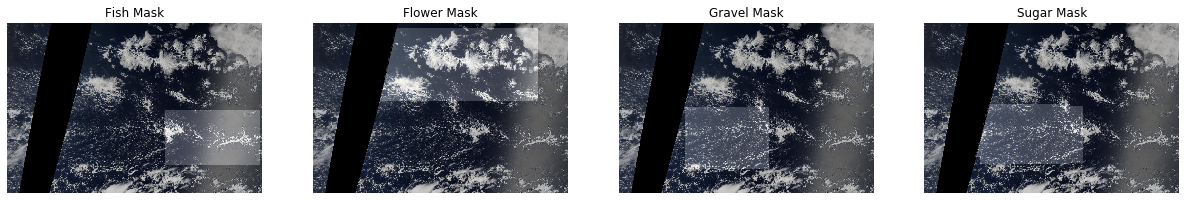

In [0]:
#image = rd.choice(df_train['Id'])
image = '8242ba0.jpg'
mask = get_mask(image,df_train)
print_mask(image,mask)

##### Tranformaciones

(4, 1400, 2100)

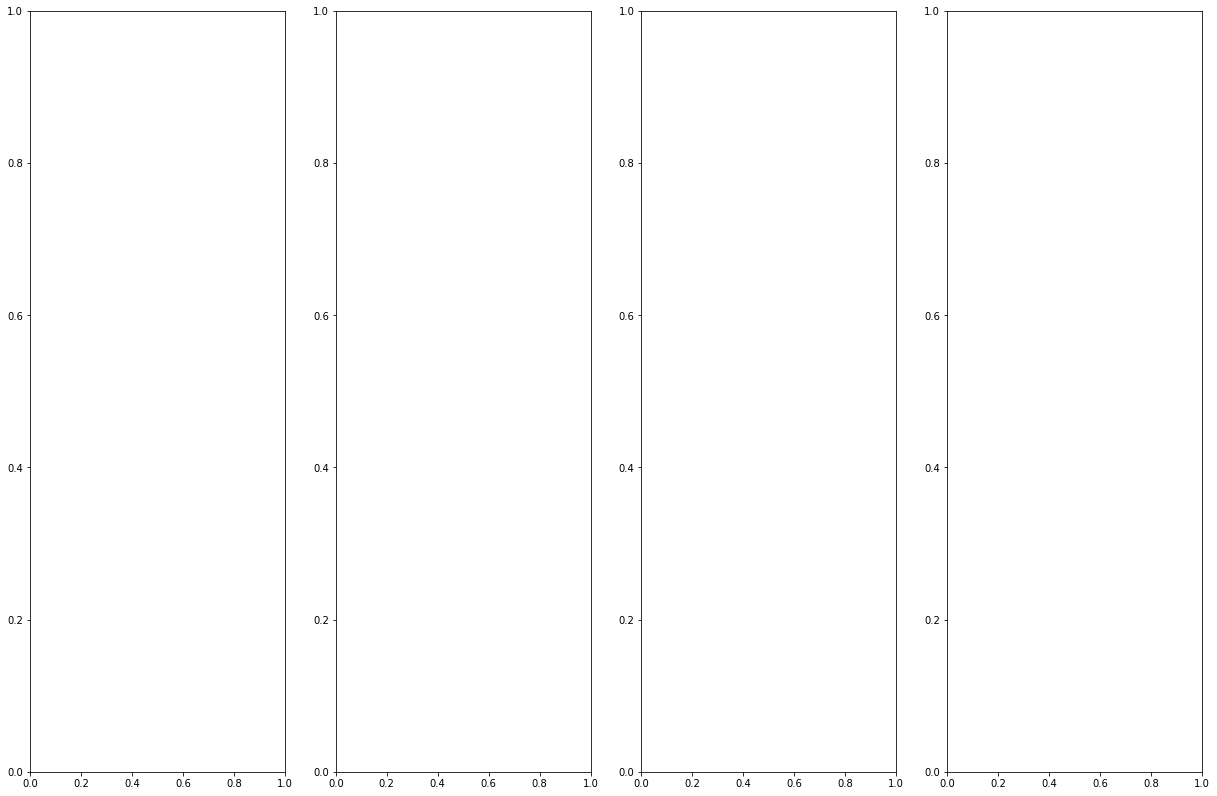

In [0]:

image = rd.choice(df_train['Id'])
#image = '8242ba0.jpg'
mask = get_mask(image,df_train)
root = './train_images/'
f, ax = plt.subplots(1, 4, figsize=(21,14))
img = io.imread(root + image)
a = np.where(mask == 'Fish')
a=mask[a[0],0]
m_fish = rle_to_mask(a[0])
a = np.where(mask == 'Flower')
a=mask[a[0],0]
m_flower = rle_to_mask(a[0])
a = np.where(mask == 'Gravel')
a=mask[a[0],0]
m_gravel = rle_to_mask(a[0])
a = np.where(mask == 'Sugar')
a=mask[a[0],0]
m_sugar = rle_to_mask(a[0])
mk=[]
mk.append(m_fish)
mk.append(m_flower)
mk.append(m_gravel)
mk.append(m_sugar)
mk = np.asarray(mk)
mk.shape

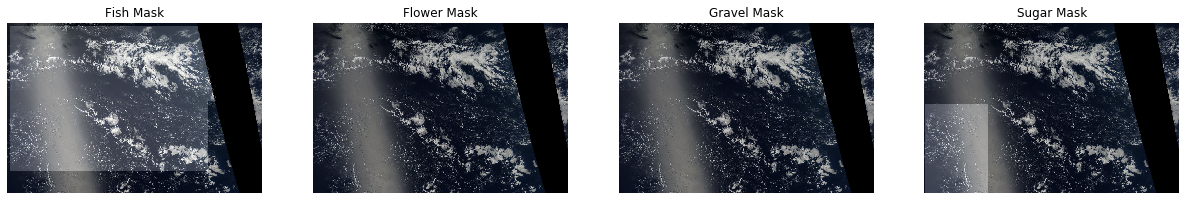

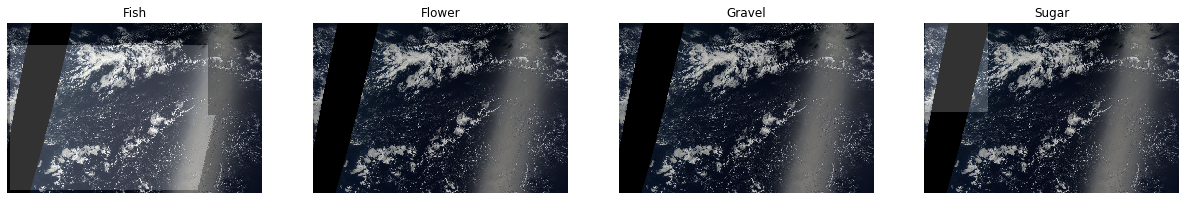

In [0]:
image = rd.choice(df_train['Id'])
#image = '8242ba0.jpg'
mask = get_mask(image,df_train)
print_mask(image,mask)
print_mask_trans(image,mask,t1)

##### Basura varia

In [0]:
rutaTrI = './train_images'
rutaTsI = './test_images'
train_files = os.listdir(rutaTrI)
test_files = os.listdir(rutaTsI)
train_files[0:9]
#train_files.index('0011165.jpg')

['d22eb33.jpg',
 'd239cc1.jpg',
 'd24e67f.jpg',
 'd25d1fb.jpg',
 'd265d38.jpg',
 'd27e37b.jpg',
 'd29a30a.jpg',
 'd2a42ee.jpg',
 'd2a540d.jpg']

In [0]:
# Load image
# https://docs.opencv.org/master/dc/d2e/tutorial_py_image_display.html
img = cv2.imread( rutaTrI +'/' + train_files[5000])
print(img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# resize image
# https://docs.opencv.org/trunk/da/d6e/tutorial_py_geometric_transformations.html
#img = cv2.resize(img, (300, 300))
#print(img.shape)

(1400, 2100, 3)


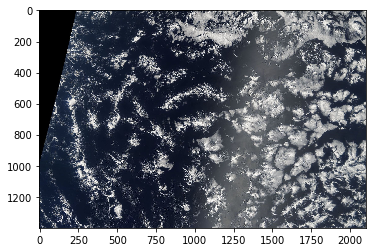

In [0]:
## mostramos la imagen
plt.imshow(img)

In [0]:
## loop para leer todo train
clouds = []

for img in train_files[0:5]:
  # Load image
  photo = cv2.imread(rutaTrI + '/' + img)
  photo = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)
  clouds.append(photo)

clouds = np.asarray(clouds)
clouds.shape

(5, 1400, 2100, 3)

In [0]:
#https://www.kaggle.com/aleksandradeis/understanding-clouds-eda
def rle_to_mask(rle_string, height, width):

    rows, cols = height, width
    
    rle_numbers = [int(num_string) for num_string in rle_string.split(' ')]
    rle_pairs = np.array(rle_numbers).reshape(-1,2)
    img = np.zeros(rows*cols, dtype=np.uint8)
    for index, length in rle_pairs:
          index -= 1
          img[index:index+length] = 255
    img = img.reshape(cols,rows)
    img = img.T
    return img

In [0]:
a = '910449 829 911849 829 913249 829 914649 829 916049 829 917449 829 918849 829 920249 829 921649 829 923049 829 924449 829 925849 829 927249 829 928649 829 930049 829 931449 829 932849 829 934249 829 935649 829 937049 829 938449 829 939849 829 941249 829 942649 829 944049 829 945449 829 946849 829 948249 829 949649 829 951049 829 952449 829 953849 829 955249 829 956649 829 958049 829 959449 829 960849 829 962249 829 963649 829 965049 829 966449 829 967849 829 969249 829 970649 829 972049 829 973449 829 974849 829 976249 829 977649 829 979049 829 980449 829 981849 829 983249 829 984649 829 986049 829 987449 829 988849 829 990249 829 991649 829 993049 829 994449 829 995849 829 997249 829 998649 829 1000049 829 1001449 829 1002849 829 1004249 829 1005649 829 1007049 829 1008449 829 1009849 829 1011249 829 1012649 829 1014049 829 1015449 829 1016849 829 1018249 829 1019649 829 1021049 829 1022449 829 1023849 829 1025249 829 1026649 829 1028049 829 1029449 829 1030849 829 1032249 829 1033649 829 1035049 829 1036449 829 1037849 829 1039249 829 1040649 829 1042049 829 1043449 829 1044849 829 1046249 829 1047649 829 1049049 829 1050449 829 1051849 829 1053249 829 1054649 829 1056049 829 1057449 829 1058849 829 1060249 829 1061649 829 1063049 829 1064449 829 1065849 829 1067249 829 1068649 829 1070049 829 1071449 829 1072849 829 1074249 829 1075649 829 1077049 829 1078449 829 1079849 829 1081249 829 1082649 829 1084049 829 1085449 829 1086849 829 1088249 829 1089649 829 1091049 829 1092449 829 1093849 829 1095249 829 1096649 829 1098049 829 1099449 829 1100849 829 1102249 829 1103649 829 1105049 829 1106449 829 1107849 829 1109249 829 1110649 829 1112049 829 1113449 829 1114849 829 1116249 829 1117649 829 1119049 829 1120449 829 1121849 829 1123249 829 1124649 829 1126049 829 1127449 829 1128849 829 1130249 829 1131649 829 1133049 829 1134449 829 1135849 829 1137249 829 1138649 829 1140049 829 1141449 829 1142849 829 1144249 829 1145649 829 1147049 829 1148449 829 1149849 829 1151249 829 1152649 829 1154049 829 1155449 829 1156849 829 1158249 829 1159649 829 1161049 829 1162449 829 1163849 829 1165249 829 1166649 829 1168049 829 1169449 829 1170849 829 1172249 829 1173649 829 1175049 829 1176449 829 1177766 912 1179166 912 1180566 912 1181966 912 1183366 912 1184766 912 1186166 912 1187566 912 1188966 912 1190366 912 1191766 912 1193166 912 1194566 912 1195966 912 1197366 912 1198766 912 1200166 912 1201566 912 1202966 912 1204366 912 1205766 912 1207166 912 1208566 912 1209966 912 1211366 912 1212766 912 1214166 912 1215566 912 1216966 912 1218366 912 1219766 912 1221166 912 1222566 912 1223966 912 1225366 912 1226766 912 1228166 912 1229566 912 1230966 912 1232366 912 1233766 912 1235166 912 1236566 912 1237966 912 1239366 912 1240766 912 1242166 912 1243566 912 1244966 912 1246366 912 1247766 912 1249166 912 1250566 912 1251966 912 1253366 912 1254766 912 1256166 912 1257566 912 1258966 912 1260366 912 1261766 912 1263166 912 1264566 912 1265966 912 1267366 912 1268766 912 1270166 912 1271566 912 1272966 912 1274366 912 1275766 912 1277166 912 1278566 912 1279966 912 1281366 912 1282766 912 1284166 912 1285566 912 1286966 912 1288366 912 1289766 912 1291166 912 1292566 912 1293966 912 1295366 912 1296766 912 1298166 912 1299566 912 1300966 912 1302366 912 1303766 912 1305166 912 1306566 912 1307966 912 1309366 912 1310766 912 1312166 912 1313566 912 1314966 912 1316366 912 1317766 912 1319166 912 1320566 912 1321966 912 1323366 912 1324766 912 1326166 912 1327566 912 1328966 912 1330366 912 1331766 912 1333166 912 1334566 912 1335966 912 1337366 912 1338766 912 1340166 912 1341566 912 1342966 912 1344366 912 1345766 912 1347166 912 1348566 912 1349966 912 1351366 912 1352766 912 1354166 912 1355566 912 1356966 912 1358366 912 1359766 912 1361166 912 1362566 912 1363966 912 1365366 912 1366766 912 1368166 912 1369566 912 1370966 912 1372366 912 1373766 912 1375166 912 1376566 912 1377966 912 1379366 912 1380766 912 1382166 912 1383566 912 1384966 912 1386366 912 1387766 912 1389166 912 1390566 912 1391966 912 1393366 912 1394766 912 1396166 912 1397566 912 1398966 912 1400366 912 1401766 912 1403166 912 1404566 912 1405966 912 1407366 912 1408766 912 1410166 912 1411566 912 1412966 912 1414366 912 1415766 912 1417166 912 1418566 912 1419966 912 1421366 912 1422766 912 1424166 912 1425566 912 1426966 912 1428366 912 1429766 912 1431166 912 1432566 912 1433966 912 1435366 912 1436766 912 1438166 912 1439566 912 1440966 912 1442366 912 1443766 912 1445166 912 1446566 912 1447966 912 1449366 912 1450766 912 1452166 912 1453566 912 1454966 912 1456366 912 1457766 912 1459166 912 1460566 912 1461966 912 1463366 912 1464766 912 1466166 912 1467566 912 1468966 912 1470366 912 1471766 912 1473166 912 1474566 912 1475966 912 1477366 912 1478766 912 1480166 912 1481566 912 1482966 912 1484366 912 1485766 912 1487166 912 1488566 912 1489966 912 1491366 912 1492766 912 1494166 912 1495566 912 1496966 912 1498366 912 1499766 912 1501166 912 1502566 912 1503966 912 1505366 912 1506766 912 1508166 912 1509566 912 1510966 912 1512366 912 1513766 912 1515166 912 1516566 912 1517966 912 1519366 912 1520766 912 1522166 912 1523566 912 1524966 912 1526366 912 1527766 912 1529166 912 1530566 912 1531966 912 1533366 912 1534766 912 1536166 912 1537566 912 1538966 912 1540366 912 1541766 912 1543166 912 1544566 912 1545966 912 1547366 912 1548766 912 1550166 912 1551566 912 1552966 912 1554366 912 1555766 912 1557166 912 1558566 912 1559966 912 1561366 912 1562766 912 1564166 912 1565566 912 1566966 912 1568366 912 1569766 912 1571166 912 1572566 912 1573966 912 1575366 912 1576766 912 1578166 912 1579566 912 1580966 912 1582366 912 1583766 912 1585166 912 1586566 912 1587966 912 1589366 912 1590766 912 1592166 912 1593566 912 1594966 912 1596366 912 1597766 912 1599166 912 1600566 912 1601966 912 1603366 912 1604766 912 1606166 912 1607566 912 1608966 912 1610366 912 1611766 912 1613166 912 1614566 912 1615966 912 1617366 912 1618766 912 1620166 912 1621566 912 1622966 912 1624366 912 1625766 912 1627166 912 1628566 912 1629966 912 1631366 912 1632766 912 1634166 912 1635566 912 1636966 912 1638366 912 1639766 912 1641166 912 1642566 912 1643966 912 1645366 912 1646766 912 1648166 912 1649566 912 1650966 912 1652366 912 1653766 912 1655166 912 1656566 912 1657966 912 1659366 912 1660766 912 1662166 912 1663566 912 1664966 912 1666366 912 1667766 912 1669166 912 1670566 912 1671966 912 1673366 912 1674766 912 1676166 912 1677566 912 1678966 912 1680366 912 1681766 912 1683166 912 1684566 912 1685966 912 1687366 912 1688766 912 1690166 912 1691566 912 1692966 912 1694366 912 1695766 912 1697166 912 1698566 912 1699966 912 1701366 912 1702766 912 1704166 912 1705566 912 1706966 912 1708366 912 1709766 912 1711166 912 1712566 912 1713966 912 1715366 912 1716766 912 1718166 912 1719566 912 1720966 912 1722366 912 1723766 912 1725166 912 1726566 912 1727966 912 1729366 912 1730766 912 1732166 912 1733566 912 1734966 912 1736366 912 1737766 912 1739166 912 1740566 912 1741966 912 1743366 912 1744766 912 1746166 912 1747566 912 1748966 912 1750366 912 1751766 912 1753166 912 1754566 912 1755966 912 1757366 912 1758766 912 1760166 912 1761566 912 1762966 912 1764366 912 1765766 912 1767166 912 1768566 912 1769966 912 1771366 912 1772766 912 1774166 912 1775566 912 1776966 912 1778366 912 1779766 912 1781166 912 1782566 912 1783966 912 1785366 912 1786766 912 1788166 912 1789566 912 1790966 912 1792366 912 1793766 912 1795166 912 1796566 912 1797966 912 1799366 912 1800766 912 1802166 912 1803566 912 1804966 912 1806366 912 1807766 912 1809166 912 1810566 912 1811966 912 1813366 912 1814766 912 1816166 912 1817566 912 1818966 912 1820366 912 1821766 912 1823166 912 1824566 912 1825966 912 1827366 912 1828766 912 1830166 912 1831566 912 1832966 912 1834366 912 1835766 912 1837166 912 1838566 912 1839966 912 1841366 912 1842766 912 1844166 912 1845566 912 1846966 912 1848366 912 1849766 912 1851166 912 1852566 912 1853966 912 1855366 912 1856766 912 1858166 912 1859566 912 1860966 912 1862366 912 1863766 912 1865166 912 1866566 912 1867966 912 1869366 912 1870766 912 1872166 912 1873566 912 1874966 912 1876366 912 1877766 912 1879166 912 1880566 912 1881966 912 1883366 912 1884766 912 1886166 912 1887566 912 1888966 912 1890366 912 1891766 912 1893166 912 1894566 912 1895966 912 1897366 912 1898766 912 1900166 912 1901566 912 1902966 912 1904366 912 1905766 912 1907166 912 1908566 912 1909966 912 1911366 912 1912766 912 1914166 912 1915566 912 1916966 912 1918366 912 1919766 912 1921166 912 1922566 912 1923966 912 1925366 912 1926766 912 1928166 912 1929566 912 1930966 912 1932366 912 1933766 912 1935166 912 1936566 912 1937966 912 1939366 912 1940766 912 1942166 912 1943566 912 1944966 912 1946366 912 1947766 912 1949166 912 1950566 912 1951966 912 1953366 912 1954766 259 1955026 652 1956166 912 1957566 912 1958966 912 1960366 912 1961766 912 1963166 912 1964566 912 1965966 912 1967366 912 1968766 912 1970166 912 1971566 912 1972966 912 1974366 912 1975766 912 1977166 912 1978566 912 1979966 912 1981366 912 1982766 912 1984166 912 1985566 912 1986966 912 1988366 912 1989766 912 1991166 912 1992566 912 1993966 912 1995366 912 1996766 912 1998166 912 1999566 912 2000966 912 2002366 912 2003766 912 2005166 912 2006566 912 2007966 912 2009366 912 2010766 912 2012166 912 2013566 912 2014966 912 2016366 912 2017766 912 2019166 912 2020566 912 2021966 912 2023366 912 2024766 912 2026166 912 2027566 912 2028966 912 2030366 912 2031766 912 2033166 912 2034566 912 2035966 912 2037366 912 2038766 912 2040166 912 2041566 912 2042966 912 2044366 912 2045766 912 2047166 912 2048566 912 2049966 912 2051366 912 2052766 912 2054166 912 2055566 912 2056966 912 2058366 912 2059766 912 2061166 912 2062566 912 2063966 912 2065366 912 2066766 912 2068166 912 2069566 912 2070966 912 2072366 912 2073766 912 2075166 912 2076566 912 2077966 912 2079366 912 2080766 912 2082166 912 2083566 912 2084966 912 2086366 912 2087766 912 2089166 912 2090566 912 2091966 912 2093366 912 2094766 912 2096166 912 2097566 912 2098966 912 2100366 912 2101766 912 2103166 912 2104566 912 2105966 912 2107366 912 2108766 912 2110166 912 2111566 912 2112966 912 2114366 912 2115766 912 2117166 912 2118566 912 2119966 912 2121366 912 2122766 912 2124166 912 2125566 912 2126966 912 2128366 912 2129766 912 2131166 912 2132566 912 2133966 912 2135366 912 2136766 912 2138166 912 2139566 912 2140966 912 2142366 912 2143766 912 2145166 912 2146566 912 2147966 912 2149366 912 2150766 912 2152166 912 2153566 912 2154966 912 2156366 912 2157766 912 2159166 912 2160566 912 2161966 912 2163366 912 2164766 912 2166166 912 2167566 912 2168966 912 2170366 912 2171766 912 2173166 912 2174566 912 2175966 912 2177366 912 2178766 912 2180166 912 2181566 912 2182966 912 2184366 912 2185766 912 2187166 912 2188566 912 2189966 912 2191366 912 2192766 912 2194166 912 2195566 912 2196966 912 2198366 912 2199766 912 2201166 912 2202566 912 2203966 912 2205366 912 2206766 912 2208166 912 2209566 912 2210966 912 2212366 912 2213766 912 2215166 912 2216566 912 2217966 912 2219366 912 2220766 912 2222166 912 2223566 912 2224966 912 2226366 912 2227766 912 2229166 912 2230566 912 2231966 912 2233366 912 2234766 912 2236166 912 2237566 912 2238966 912 2240366 912 2241766 912 2243166 912 2244566 912 2245966 912 2247366 912 2248766 912 2250166 912 2251566 912 2252966 912 2254366 912 2255766 912 2257166 912 2258566 912 2259966 912 2261366 912 2262766 912 2264166 912 2265566 912 2266966 912 2268366 912 2269766 912 2271166 912 2272566 912 2273966 912 2275366 912 2276766 912 2278166 912 2279566 912 2280966 912 2282366 912 2283766 912 2285166 912 2286566 912 2287966 912 2289366 912 2290766 912 2292166 912 2293566 912 2294966 912 2296366 912 2297766 912 2299166 912 2300566 912 2301966 912 2303366 912 2304766 912 2306166 912 2307566 912 2308966 912 2310366 912 2311766 912 2313166 912 2314566 912 2315966 912 2317366 912 2318766 912 2320166 912 2321566 912 2322966 912 2324366 912 2325766 912 2327166 912 2328566 912 2329966 912 2331366 912 2332766 912 2334166 912 2335566 912 2336966 912 2338366 912 2339766 912 2341166 912 2342566 912 2343966 912 2345366 912 2346766 912 2348166 912 2349566 912 2350966 912 2352366 912 2353766 912 2355166 585 2356566 585 2357966 585 2359366 585 2360766 585 2362166 585 2363566 585 2364966 585 2366366 585 2367766 585 2369166 585 2370566 585 2371966 585 2373366 585 2374766 585 2376166 585 2377566 585 2378966 585 2380366 585 2381766 585 2383166 585 2384566 585 2385966 585 2387366 585 2388766 585 2390166 585 2391566 585 2392966 585 2394366 585 2395766 585 2397166 585 2398566 585 2399966 585 2401366 585 2402766 585 2404166 585 2405566 585 2406966 585'

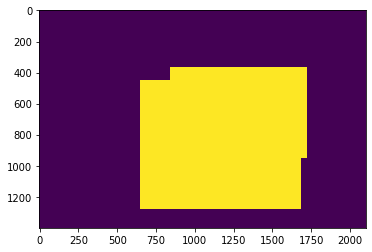

In [0]:
plt.imshow(rle_to_mask(a,1400,2100))

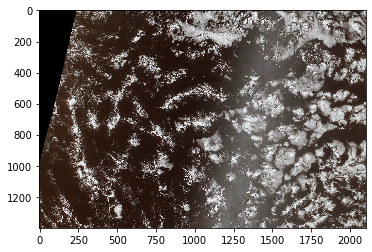

In [0]:
id = train_files.index('0011165.jpg')
img = cv2.imread( rutaTrI +'/' + train_files[id])
plt.imshow(img)

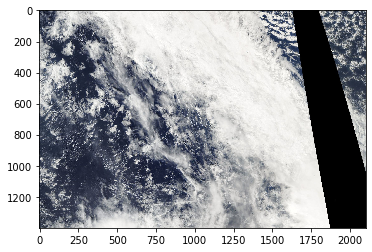

In [0]:
rutaTrI = './train_images'
ids = '228ad71.jpg'
img = io.imread( rutaTrI +'/' + ids)
data = {'image':img}
a = t1(**data)
plt.imshow(a['image'])